In [1]:
data('ToothGrowth')
df = ToothGrowth

In [2]:
set.seed(42)
dplyr::sample_n(df, 10)

len,supp,dose
24.8,OJ,2.0
30.9,OJ,2.0
13.6,VC,1.0
21.2,OJ,1.0
10.0,OJ,0.5
23.3,VC,2.0
9.7,OJ,0.5
11.2,VC,0.5
14.5,OJ,0.5
29.4,OJ,2.0


In [3]:
# Structure of data frame
str(df)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


We see that `dose` is numeric, but we have to make it a factor.

In [4]:
# Convert dose as a 3-level factor with labels 'D0.5', 'D1', 'D2'
df$dose <- factor(df$dose, levels = c(0.5, 1, 2), labels = c('D0.5', 'D1', 'D2'))
head(df)

len,supp,dose
4.2,VC,D0.5
11.5,VC,D0.5
7.3,VC,D0.5
5.8,VC,D0.5
6.4,VC,D0.5
10.0,VC,D0.5


In [5]:
table(df$supp, df$dose)

    
     D0.5 D1 D2
  OJ   10 10 10
  VC   10 10 10

We have 2X3 design cells with the factors being `supp` and `dose` and 10 subjects in each cell.

Here, we have a balanced design.

# Visualization

Box plot to plot the data grouped by the combinations of the levels of the two factors.

Plot tooth length `len` by groups `dose`

And color box plot by a second group: `supp`

In [6]:
colors <- c('#0000BB', '#00BB00') # c("#00AFBB", "#E7B800")

Loading required package: ggplot2
Loading required package: magrittr


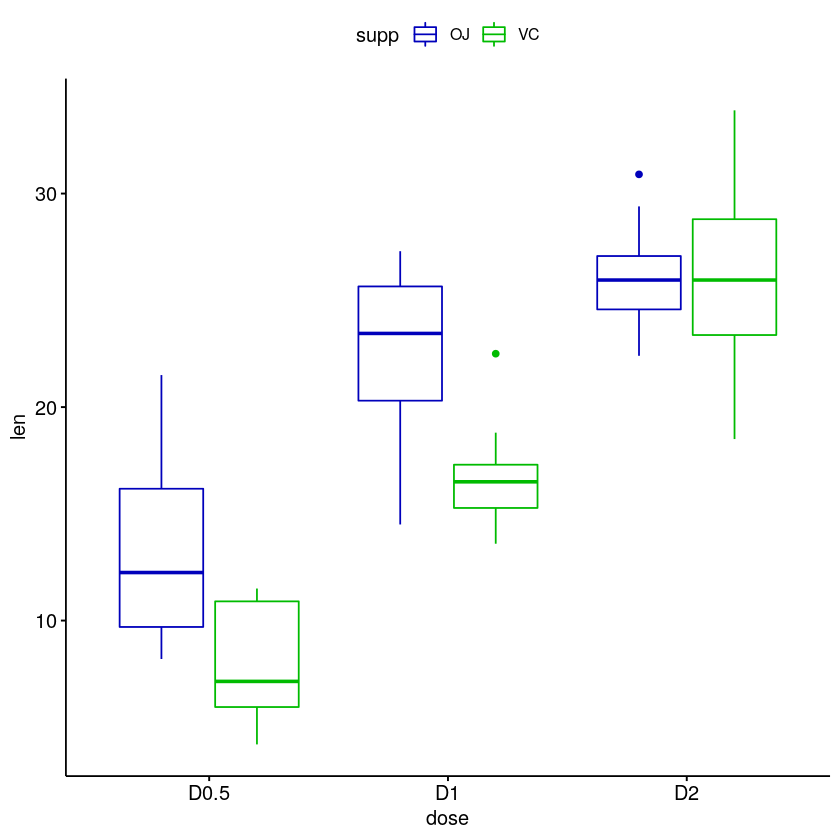

In [7]:
library("ggpubr")
ggboxplot(df, x = "dose", y = "len", color = "supp", palette = colors)

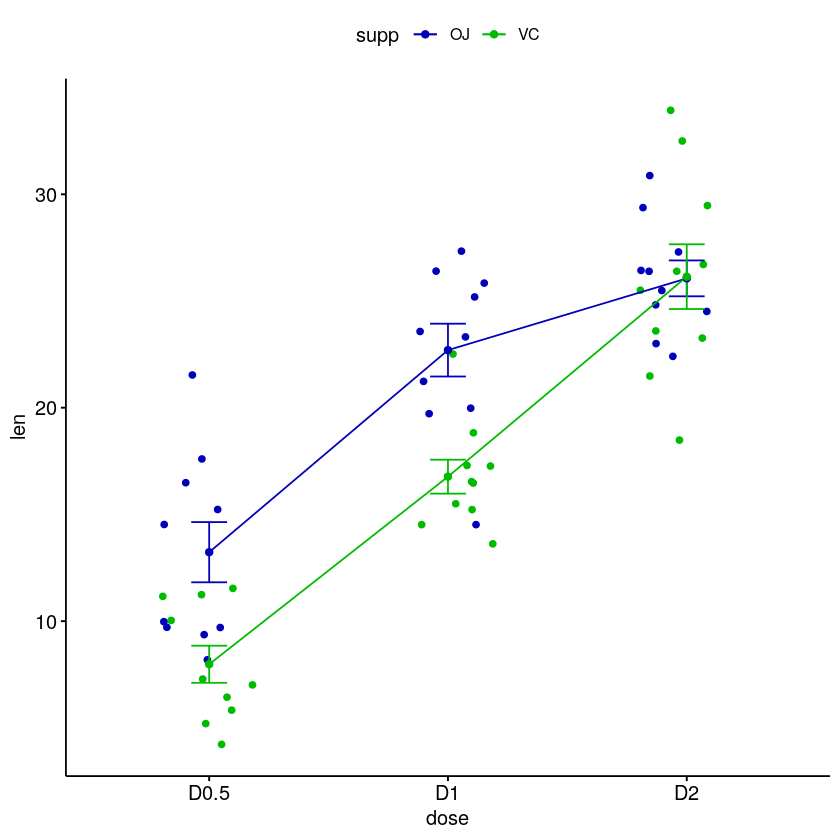

In [22]:
# Line plots with multiple groups
# Add error bars: mean_se (other values include: mean_sd, mean_ci, median_iqr, ....)
ggline(df, x = "dose", y = "len", color = "supp",
       add = c("mean_se", "jitter"),
       palette = colors)

# 2-Way ANOVA Test

In [9]:
model.aov2 <- aov(len ~ supp + dose, data = df)
model.aov2

Call:
   aov(formula = len ~ supp + dose, data = df)

Terms:
                    supp     dose Residuals
Sum of Squares   205.350 2426.434   820.425
Deg. of Freedom        1        2        56

Residual standard error: 3.82759
Estimated effects may be unbalanced

In [10]:
summary(model.aov2)

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4   14.02 0.000429 ***
dose         2 2426.4  1213.2   82.81  < 2e-16 ***
Residuals   56  820.4    14.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

From the ANOVA table we can conclude that both `supp` and `dose` are **statistically significant**.

`dose` is the most significant factor variable.

These results would lead us to believe that changing delivery methods (`supp`) or the `dose` of vitamin C, will impact significantly the mean `tooth length`.

# 2-way ANOVA with interaction effect

In [11]:
model.aov3 <- aov(len ~ supp + dose + supp:dose, data = df)
model.aov3

Call:
   aov(formula = len ~ supp + dose + supp:dose, data = df)

Terms:
                    supp     dose supp:dose Residuals
Sum of Squares   205.350 2426.434   108.319   712.106
Deg. of Freedom        1        2         2        54

Residual standard error: 3.631411
Estimated effects may be unbalanced

In [12]:
summary(model.aov3)

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4  15.572 0.000231 ***
dose         2 2426.4  1213.2  92.000  < 2e-16 ***
supp:dose    2  108.3    54.2   4.107 0.021860 *  
Residuals   54  712.1    13.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

It can be seen that the two main effects (`supp` and `dose`) are statistically significant, as well as their interaction.

From the ANOVA results, you can conclude the following, based on the p-values and a significance level of 0.05:

* the p-value of `supp` is 0.000429 (significant), which indicates that the levels of `supp` are associated with significant different tooth length.

* the p-value of `dose` is < 2e-16 (significant), which indicates that the levels of dose are associated with significant different tooth length.

* the p-value for the interaction between `supp:dose` is 0.02 (significant), which indicates that the relationships between dose and tooth length depends on the `supp` method.

In [13]:
model.tables(model.aov3, type = 'means', se = TRUE)

Tables of means
Grand mean
         
18.81333 

 supp 
supp
    OJ     VC 
20.663 16.963 

 dose 
dose
  D0.5     D1     D2 
10.605 19.735 26.100 

 supp:dose 
    dose
supp D0.5  D1    D2   
  OJ 13.23 22.70 26.06
  VC  7.98 16.77 26.14

Standard errors for differences of means
          supp   dose supp:dose
        0.9376 1.1484    1.6240
replic.     30     20        10

# Multiple pairwise-comparison between the means of groups

with Tukey Honest Significant Differences (TukeyHSD)

In [14]:
TukeyHSD(model.aov3, which = "dose")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = len ~ supp + dose + supp:dose, data = df)

$dose
          diff       lwr       upr   p adj
D1-D0.5  9.130  6.362488 11.897512 0.0e+00
D2-D0.5 15.495 12.727488 18.262512 0.0e+00
D2-D1    6.365  3.597488  9.132512 2.7e-06


In [15]:
TukeyHSD(model.aov3, which = "supp")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = len ~ supp + dose + supp:dose, data = df)

$supp
      diff       lwr       upr     p adj
VC-OJ -3.7 -5.579828 -1.820172 0.0002312


In [16]:
library(multcomp)
summary(glht(model.aov2, linfct = mcp(dose = "Tukey")))

Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser




	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = len ~ supp + dose, data = df)

Linear Hypotheses:
               Estimate Std. Error t value Pr(>|t|)    
D1 - D0.5 == 0    9.130      1.210   7.543   <1e-04 ***
D2 - D0.5 == 0   15.495      1.210  12.802   <1e-04 ***
D2 - D1 == 0      6.365      1.210   5.259   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


# Check ANOVA assumptions

ANOVA assumes that the data are **normally distributed** and the variances across groups are **homogeneous**. We can check that with some diagnostic plots.

## Homogeneity of variances

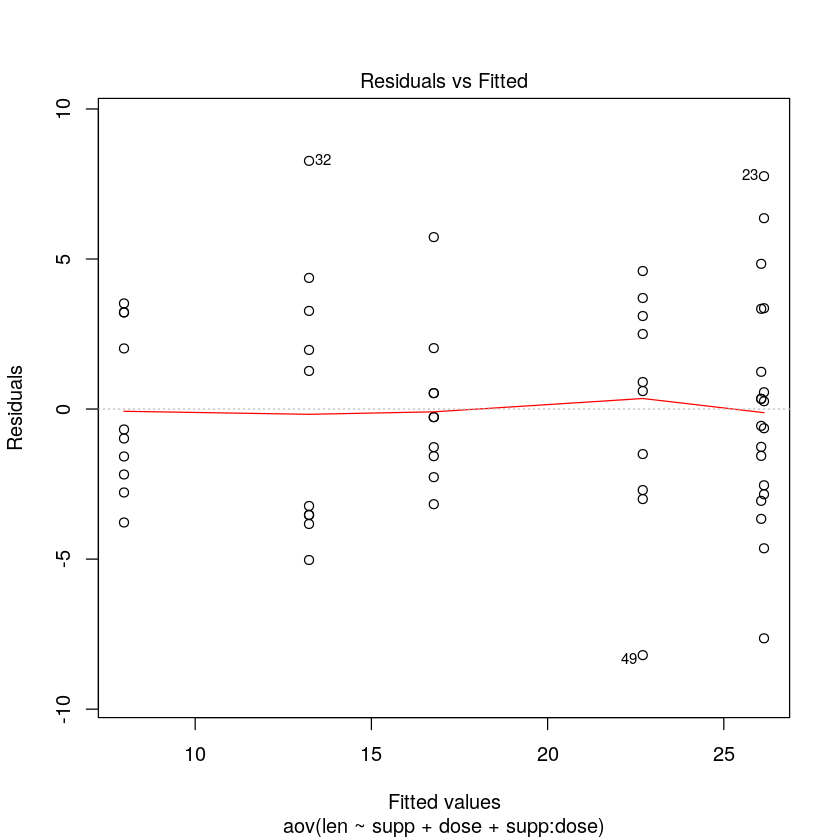

In [17]:
plot(model.aov3, 1)

#### Points 32 and 23 are detected as outliers, which can affect normality and homogeneity of variance. It can be useful to remove outliers to meet the test assumptions.

We can use the Levene Test to see if variances across groups are statistically significantly different

In [18]:
# library(car)
# leveneTest(len ~ supp * dose, data = df)

ERROR: Error in library(car): there is no package called ‘car’


## Normality assumpttion

Normality plot of the residuals. In the plot below, the quantiles of the residuals are plotted against the quantiles of the normal distribution. A 45-degree reference line is also plotted.

The normal probability plot of residuals is used to verify the assumption that the residuals are **normally distributed**.

The normal probability plot of the residuals should approximately follow a straight line.

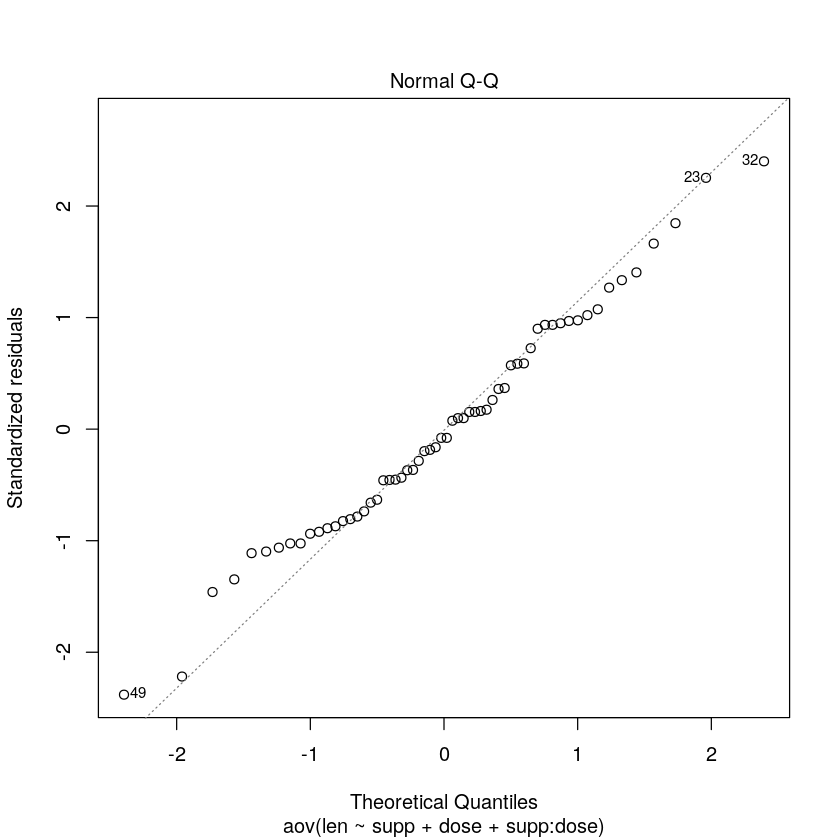

In [19]:
plot(model.aov3, 2)

The conclusion above, is supported by the **Shapiro-Wilk** test on the ANOVA residuals (W = 0.98, p = 0.5) which finds no indication that normality is violated.

In [20]:
# Extract the residuals
aov_residuals <- residuals(object = model.aov3)

# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.98499, p-value = 0.6694


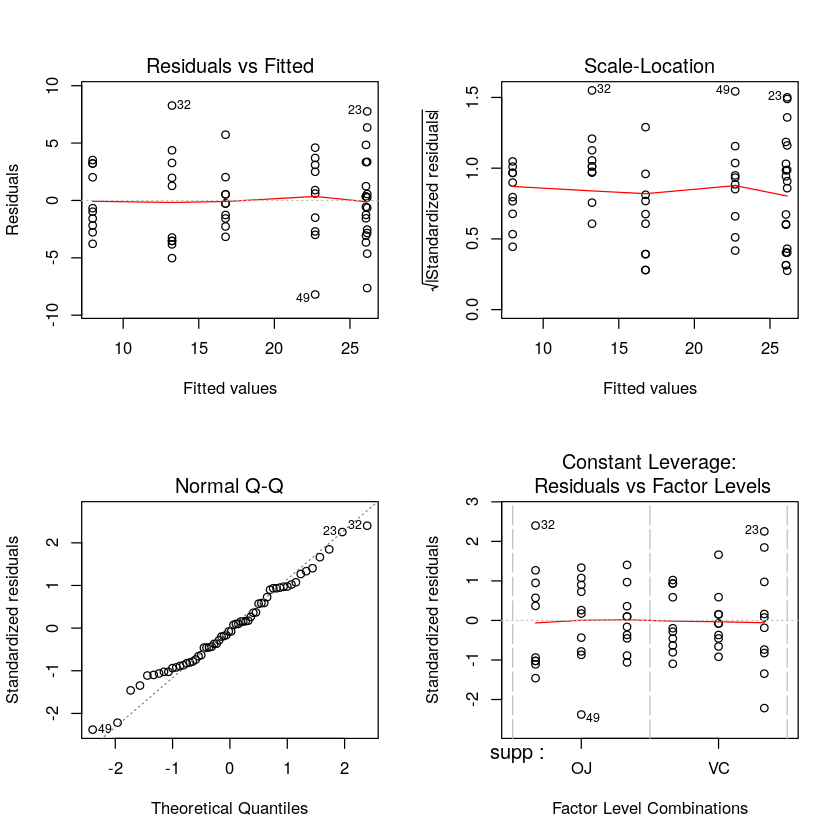

In [21]:
layout(matrix(c(1,2,3,4),2,2))
plot(model.aov3)